# Question 1: Loading the dataset


In order to load the dataset we need to use the python json library.

In [67]:

import pandas as pd
import json 
tweets = []
for line in open('transactions.txt', 'r'):
    tweets.append(json.loads(line))
#print(tweets[0])
df = pd.DataFrame(tweets)

Please describe the structure of the data. Number of records and fields in each record?



In [68]:
print(df.describe())
print(df.info())

       availableMoney    creditLimit  currentBalance  transactionAmount
count   641914.000000  641914.000000   641914.000000      641914.000000
mean      6652.828573   10697.210608     4044.382035         135.162497
std       9227.132275   11460.359133     5945.510224         147.053302
min      -1244.930000     250.000000        0.000000           0.000000
25%       1114.970000    5000.000000      502.442500          32.320000
50%       3578.165000    7500.000000     2151.860000          85.800000
75%       8169.185000   15000.000000     5005.890000         189.030000
max      50000.000000   50000.000000    47496.500000        1825.250000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null object
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 n

Question 2: Plot

Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

Report any structure you find and any hypotheses you have about that structure.

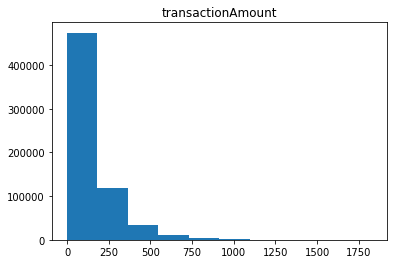

(0.0, 1825.25)

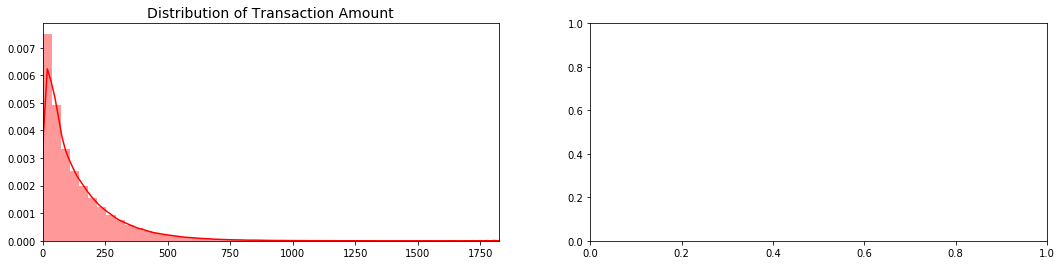

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['transactionAmount'])
plt.title("transactionAmount")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['transactionAmount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

The histogram represents the frequency of each type of transaction. We can see that most of the transactions are between the amounts of 0 and 250 dollars.

# Question 3: Data Wrangling - Duplicate Transactions


You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span. Another example is a reversed transaction, where a purchase is followed by a reversal.

Can you programmatically identify duplicated and reversed transactions?

Did you find anything interesting about either of these transaction types?

What share of transactions (both number of transactions and the dollar amount) do you estimate for the duplicated and reversed transaction types that you identified? In a multi-swipe transaction, please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts.

In [70]:
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


In [110]:
def split_it(year):
    x = year.split('T')[0]
    return x


df['buydate'] = df['transactionDateTime'].apply(split_it)
df.head(100)

df['duplicated'] = (df.duplicated(subset=['accountNumber','cardLast4Digits','buydate','merchantName','transactionAmount'], keep=False))
a = df['duplicated'] == True
din = df[a]
din.head()
din = din[din.transactionType != "ADDRESSVERIFICATION"]

din = din[din.transactionType != "ADDRESS_VERIFICATION"]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)


din.head(100)
df_reversal = din.copy()
rev_hold = df_reversal[df_reversal.transactionType == "REVERSAL"]
rev_hold.head(100)
df_reversal = df_reversal[df_reversal.transactionType != "REVERSAL"]
df_reversal.head(100)
df_reversal['dup'] = (df_reversal.duplicated(subset=['accountNumber','cardLast4Digits','buydate','merchantName','transactionAmount'], keep=False))
df_reversal.head(100)
df_reversal['jil'] = (df_reversal.duplicated(subset=['accountNumber','cardLast4Digits','buydate','merchantName','transactionAmount'], keep=False))
aa = df_reversal['jil'] == True
d = df_reversal[aa]
d.head(100)

neg_rev = df_reversal['jil'] == False
neg_rev = df_reversal[neg_rev]
neg_rev.head(100)
spinakker = d.drop_duplicates(['accountNumber','cardLast4Digits','buydate','merchantName','transactionAmount'], keep='last')
spinakker.head(100)
#d-spinkkaer = duplicates ; add 

duplicatecount = len(d) - len(spinakker) + len(rev_hold)
print(duplicatecount)
print(df.describe())
print(spinakker.describe())
print(rev_hold.describe())





10486
       availableMoney    creditLimit  currentBalance  transactionAmount
count   641914.000000  641914.000000   641914.000000      641914.000000
mean      6652.828573   10697.210608     4044.382035         135.162497
std       9227.132275   11460.359133     5945.510224         147.053302
min      -1244.930000     250.000000        0.000000           0.000000
25%       1114.970000    5000.000000      502.442500          32.320000
50%       3578.165000    7500.000000     2151.860000          85.800000
75%       8169.185000   15000.000000     5005.890000         189.030000
max      50000.000000   50000.000000    47496.500000        1825.250000
       availableMoney   creditLimit  currentBalance  transactionAmount
count     5434.000000   5434.000000     5434.000000        5434.000000
mean      6400.965186  10848.178138     4447.212952         148.288888
std       8728.008047  11641.618719     6498.922784         148.214011
min       -771.560000    250.000000        0.000000           

Using the 'duplicated' function we identify that 10486 entries are reversed and duplicated, with the first transaction of these groups removed.  

We first use regex to split the column on the 'T' letter for the 'transactionDateTime' column. This allows us to group rows by the date, if repeated rows are in the same day they can be identified dupliacates. Next, we drop the 'ADDRESS VERIFICATION' from transaction type to focus on purchases and reversals. Finally, we drop the 'REVERSE' tags into another dataframe, next we use the drop_duplicates function to get a count of the unique rows for the duplicated dataframe, this final value gives us the sum of duplicated and reversed transactions.

Using the 'describe' function we see that the duplicated and reversed transaction have a higher current balance, transaction amount, credit limit and available money.

# Question 4 Model

This phase needs us to distinguish fradulent rows from normal transactions. Initally we walk through some Exploratory Data Analysis to get a feel for the data. 

Procedure:

Initially, we load the csv file of the transactions. Next, we fill in the missing values by data imputation. After this step we see that many columns have categorical data and convert those values to numerical data. Finally, we find many columns which have no data or have categorical data which doesn't add value to the model. Next we run feature engineering to gain some information from the columns we dropped. Finally, we undersample and create a model to classify fraudulent transactions.

In [111]:
import pandas as pd
import numpy as np
import copy

df_flights = pd.read_csv('transactions.csv')
df_flights.head()
print(df_flights.info())
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
cat_df_flights.head()
print(cat_df_flights.isnull().sum())
cat_df_flights = cat_df_flights.fillna(cat_df_flights['acqCountry'].value_counts().index[0])
cat_df_flights = cat_df_flights.fillna(cat_df_flights['merchantCountryCode'].value_counts().index[0])
cat_df_flights = cat_df_flights.fillna(cat_df_flights['transactionType'].value_counts().index[0])
##WORKS


replace_map = {'merchantCountryCode': {'US': 1, 'MEX': 2, 'CAN': 3, 'PR': 4}}
replace_map2 = {'acqCountry': {'US': 1, 'MEX': 2, 'CAN': 3, 'PR': 4}}
replace_map3 = {'transactionType': {'PURCHASE': 1, 'ADDRESS_VERIFICATION': 2, 'REVERSAL': 3, 'US': 4}}


labels = cat_df_flights['merchantCountryCode'].astype('category').cat.categories.tolist()
replace_map_comp = {'merchantCountryCode' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

labels2 = cat_df_flights['acqCountry'].astype('category').cat.categories.tolist()
replace_map_comp2 = {'acqCountry' : {k: v for k,v in zip(labels2,list(range(1,len(labels2)+1)))}}

labels3 = cat_df_flights['transactionType'].astype('category').cat.categories.tolist()
replace_map_comp3 = {'transactionType' : {k: v for k,v in zip(labels3,list(range(1,len(labels3)+1)))}}



#print(replace_map_comp3)
#print(replace_map_comp)

print("#########################")
cat_df_flights_replace = cat_df_flights.copy()
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

cat_df_flights_r = cat_df_flights_replace.copy()
cat_df_flights_r.replace(replace_map_comp2, inplace=True)

#


print(cat_df_flights_r.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 30 columns):
Unnamed: 0                  641914 non-null int64
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null object
acqCountry                  638001 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null int64
dateOfLastAddressChange     641914 non-null object
echoBuffer                  0 non-null float64
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 

This analysis shows that we have many non numeric features, object which represent dates, mechants and so on. To improve and simplify our model we use a replace map to represent categorized variables as numeric values. Next, we perform some feature engineering to identify the age of the account.

In [112]:
df_flights['acqCountry'] = cat_df_flights_r['acqCountry'].values
df_flights['merchantCountryCode'] = cat_df_flights_r['acqCountry'].values


df_flights.head()
#print(df_flights['enteredCVV'],df_flights['cardCVV'])


df = df_flights.copy()

from datetime import datetime, timedelta
din = df.copy()
try:
    din.drop('diff',axis=1,inplace=True)
except:
    print("not working")
import re
def split_it(year):
    x = year.split('T')[0]
    return x

din['buydate'] = din['transactionDateTime'].apply(split_it)

din['buydate'] = pd.to_datetime(din['buydate'])
din['accountOpenDate'] = pd.to_datetime(din['accountOpenDate'])

#print(din['accountOpenDate'])
din['diff'] = (din['buydate'] - din['accountOpenDate'])
din['diff'] = din['diff'] / timedelta (days=1)
#print(din['diff'])
#df.drop('Unnamed: 0',axis=1,inplace=True)
replace_map = {'merchantCategoryCode': {'online_retail': 1, 'fastfood': 2, 'entertainment': 3, 'food': 4,'rideshare':5,'online_gifts':6, 'hotels':7, 'fuel':8, 'subscriptions':9, 'personal care':10,'mobileapps':11, 'health':12, 'online_subscriptions':13, 'auto':14, 'airline':15, 'furniture':16,'food_delivery':17, 'gym':18, 'cable/phone':19}}

labels = df['merchantCategoryCode'].astype('category').cat.categories.tolist()
replace_map_comp = {'merchantCategoryCode' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df = df.copy()
df.replace(replace_map_comp, inplace=True)

not working
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 30 columns):
Unnamed: 0                  641914 non-null int64
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null object
acqCountry                  641914 non-null int64
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null int64
dateOfLastAddressChange     641914 non-null object
echoBuffer                  0 non-null float64
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode    

# Skewed Data

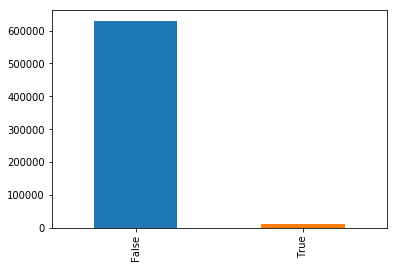

In [113]:
import matplotlib as plt
count_classes = pd.value_counts(df['isFraud'], sort = True).sort_index()
count_classes.plot(kind = 'bar')


From this figure we can see that the dataset is very skewed, this means we have only a few example of fraudulent examples with respect with to normal transactions. If we simply use a generic model on this data we will get a high precision value, but it doesn't represent the failure to detect fraudulent transactions.

In order to mitigate this we need to perform either undersampling or oversampling, in this case we can't add data so we undersample. Next, we drop columns which are objects, or don't have rows.

In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [125]:

dfRaw = pd.read_csv('dropped.csv')

dfRaw.drop('Unnamed: 0',axis = 1, inplace = True)
print(dfRaw.shape)
print(dfRaw.columns)

(641914, 18)
Index(['accountNumber', 'acqCountry', 'availableMoney', 'cardCVV',
       'cardLast4Digits', 'cardPresent', 'creditLimit', 'currentBalance',
       'customerId', 'enteredCVV', 'expirationDateKeyInMatch', 'isFraud',
       'merchantCategoryCode', 'merchantCountryCode', 'posConditionCode',
       'posEntryMode', 'transactionAmount', 'diff'],
      dtype='object')


In [126]:
df= dfRaw.copy()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('isFraud', axis=1)
y = df['isFraud']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    #print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 98.24 % of the dataset
Frauds 1.76 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[ 0.98239253  0.01760747]
[ 0.98239629  0.01760371]


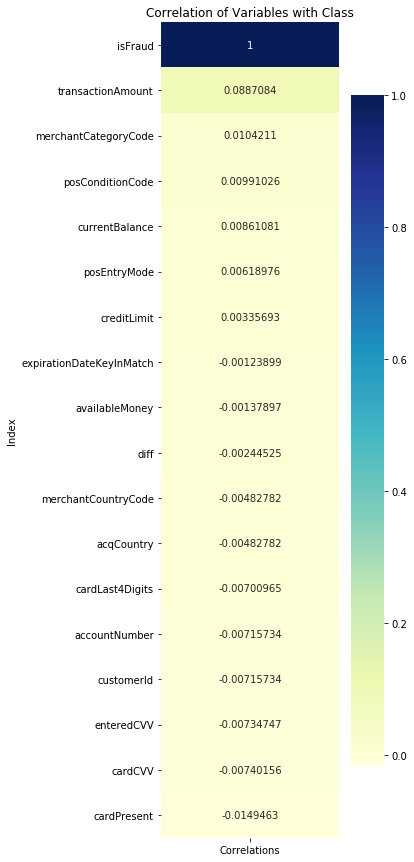

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corrwith(df['isFraud']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

Here, we undersample and take a random length of data similar to the size of fraudulent data.

In [134]:

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:9500]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,posConditionCode,posEntryMode,transactionAmount,diff
640803,584174368,4,388.78,893,3586,False,1000.0,611.22,584174368,893,False,False,19,4,1.0,9.0,-0.378723,633.0
529817,318001076,4,8201.03,633,1789,False,50000.0,41798.97,318001076,633,False,False,15,4,1.0,5.0,-0.564847,30.0
288566,608084384,4,7500.00,281,4905,True,7500.0,0.00,608084384,281,False,False,8,4,1.0,2.0,-0.586403,725.0
36870,798981461,4,1082.70,848,2612,False,5000.0,3917.30,798981461,848,False,True,15,4,1.0,5.0,0.437036,1771.0
423544,270641542,4,18793.52,269,6505,True,50000.0,31206.48,270641542,269,False,False,17,4,1.0,2.0,1.375132,1676.0


In [135]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))

print(len(new_df))

new_df = new_df.fillna(new_df.mean())


Distribution of the Classes in the subsample dataset
True     0.543313
False    0.456687
Name: isFraud, dtype: float64
20802


In [139]:
# Undersampling before cross validating (prone to overfit)
new_df = new_df.fillna(new_df.mean())

X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [140]:
rfc = RandomForestClassifier(n_estimators=775, criterion='entropy', max_depth=40, 
                              bootstrap=True, oob_score=False, 
                             n_jobs=4, random_state=None, verbose=0)


model = rfc.fit(X_train,y_train)
#predicting our labels
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

       False       0.72      0.66      0.69       951
        True       0.73      0.78      0.76      1130

   micro avg       0.73      0.73      0.73      2081
   macro avg       0.73      0.72      0.72      2081
weighted avg       0.73      0.73      0.73      2081

[[630 321]
 [246 884]]


0.72753483901970206

In [138]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.4, learning_rate = 0.01,max_depth = 50, alpha = 0.1, n_estimators = 200)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

0.708793849111
              precision    recall  f1-score   support

       False       0.73      0.60      0.66       975
        True       0.69      0.81      0.75      1106

   micro avg       0.71      0.71      0.71      2081
   macro avg       0.71      0.70      0.70      2081
weighted avg       0.71      0.71      0.70      2081

[[582 393]
 [213 893]]


Finally, we can train a model to get an accuracy of about 75%. This model is evaulated on a subset from a undersmapling of the original dataset.

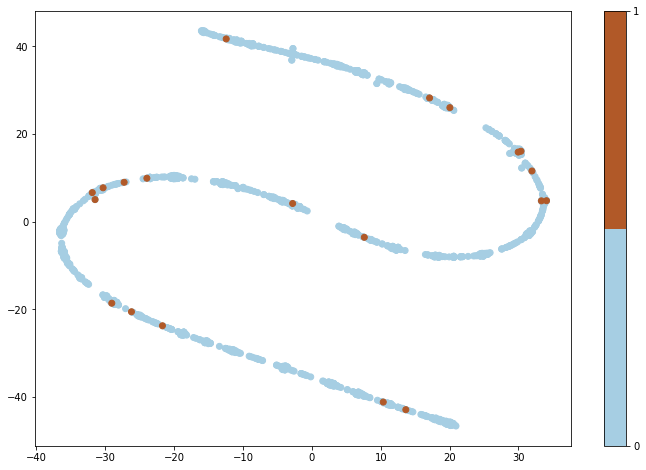

In [145]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot
import os
df = df.fillna(df.mean())

df_plt=df[df['isFraud']==0].sample(1000)
df_plt_pos=df[df['isFraud']==1].sample(20)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['isFraud']
X_plt=df_plt.drop('isFraud',1)
X_embedded = TSNE(n_components=2).fit_transform(X_plt)
pyplot.figure(figsize=(12,8))
pyplot.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=pyplot.cm.get_cmap("Paired", 2))
pyplot.colorbar(ticks=range(2))

# Future Work and other approaches:

I attempted other models like and autoencoders and an isolation forest, to identify fraudulent transactions, the results(68%) were worse than the classification approach. From the T-sne plot and correlation values we can see that it's difficult to distinguish fraudulent transactions, to mitigate this we can use PCA and other dimensionality reduction techniques cluster our samples. We can also explore unsupervised methods, wherein we define a custom metric, to separate our classes. We can also perform more feature engineering to identify other means to identify fraudulent users.